In [19]:
import cudf
import pandas as pd
import numpy as np
import time

In [20]:
np.random.seed(0)

In [21]:
pdf = pd.DataFrame({
    "numbers": np.random.randint(-1000, 1000, 10_000_00, dtype='int64')
})

In [22]:
pdf

,numbers
0,-316
1,-441
2,653
3,216
4,-165
...,...
999995,309
999996,-748
999997,-615
999998,-590


In [23]:
gdf = cudf.from_pandas(pdf)

In [24]:
gdf

,numbers
0,-316
1,-441
2,653
3,216
4,-165
...,...
999995,309
999996,-748
999997,-615
999998,-590


In [25]:
def time_it(callable):
    start = time.time()
    callable()
    end = time.time()
    return end - start

In [26]:
start = time.time()
pdf.to_parquet("pandas.parquet")
end = time.time()

In [27]:
pandas_to_parquet = time_it(lambda : pdf.to_parquet("pandas.parquet"))

In [28]:
cudf_to_parquet = time_it(lambda : gdf.to_parquet("cudf.parquet"))

In [29]:
pandas_read_parquet = time_it(lambda : pd.read_parquet("pandas.parquet"))

In [30]:
cudf_read_parquet = time_it(lambda : cudf.read_parquet("cudf.parquet"))

In [31]:
pandas_to_csv = time_it(lambda : pdf.to_csv("pandas.csv"))

In [32]:
cudf_to_csv = time_it(lambda : gdf.to_csv("cudf.csv"))

In [33]:
pandas_read_csv = time_it(lambda : pd.read_csv("pandas.csv"))

In [34]:
cudf_read_csv = time_it(lambda : cudf.read_csv("cudf.csv"))

In [35]:
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
perf_df = pd.DataFrame(
    {
        "perf": [pandas_to_parquet/cudf_to_parquet, pandas_read_parquet/cudf_read_parquet, pandas_to_csv/cudf_to_csv, pandas_read_csv/cudf_read_csv],
}, index=["to_parquet", "read_parquet", "to_csv", "read_csv"])

In [ ]:
perf_df

,perf
to_parquet,1.843559
read_parquet,2.434738
to_csv,49.643244
read_csv,7.659308


<AxesSubplot: >

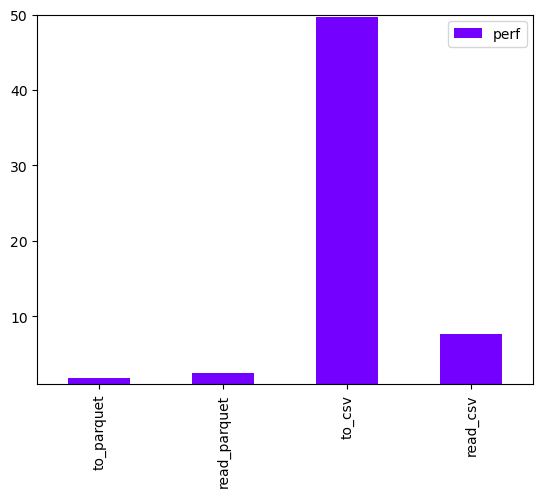

In [ ]:
perf_df.plot(kind='bar', color='#7400ff', ylim=(1,50))